#모듈 임포트

In [19]:
import pandas as pd
import numpy as np


# Growth Hackers - 16기 리크루팅 퀘스트 - Pandas & python 영역
본 영역은 Growth Hackers에서 자주 쓰이는 Pandas에 대한 기초적 이해도 증진을 위해 출제되었습니다.  

해당 라이브러리를 접해보지 않았더라도, 검색과 학습을 통하여 충분히 해결 가능하도록 출제하였고, 지금으로서는 익숙치 않더라도 리크루팅 기간 내에 아래의 내용을 충분히 학습하여 문제를 풀어 주시면 충분합니다. 각 문항의 예시 부분은 정답 데이터 프레임의 일부분에 해당합니다.

본 영역의 풀이는 Chat GPT를 포함하여 모든 종류의 툴, 프레임워크, 검색을 허용합니다. 다만, 본 영역의 내용은 학회 활동시 매우 빈번하게 사용되므로, 상당한 수준의 숙련을 권장합니다. 검증을 목적으로 면접에서 유사한 질문이 제시될 수 있습니다. 아래는 학습에 도움이 되는 페이지들입니다.


---
Pandas 공식 문서 : https://pandas.pydata.org/docs/index.html  
Stack Overflow : https://stackoverflow.com/  
구글, Git hub 등


#0. csv 파일 불러오기

cheese_details_url_country_datetime.csv, cheese_details_0_500.csv, cheese_details_500_1187.csv를 pd.read_csv를 활용해 각각 data_1, data_2, data_3 데이터 프레임으로 내려 받으세요. (데이터 설명에 존재하지 않는 열은 drop을 활용해 제거해주세요.)

In [20]:
data_1 = pd.read_csv('cheese_details_url_country_datetime.csv')
data_2 = pd.read_csv('cheese_details_0_500.csv')
data_3 = pd.read_csv('cheese_details_500_1187.csv')

data_1 = data_1.drop(columns=data_1.columns[[0,1]])

#1. 테이블 합치기

##problem 1-0

data_1의 datetime 열의 데이터 타입을 pd.to_datetime을 활용해 timestamp로 변경하고 해당 datetime 열의 달(month)를 담은 month 열을 추가하세요. 이 때 dt.month를 활용하세요.

예시)

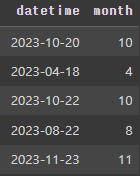

In [21]:
data_1['datetime'] = pd.to_datetime(data_1['datetime'])

data_1['month'] = data_1['datetime'].dt.month

## problem 1-1

data_2와 data_3를 행을 기준으로 합한 problem_1_1_df 데이터 프레임을 생성하세요. 이 때, ignore_index()를 활용하여 새로운 인덱스를 만드세요.

In [22]:
problem_1_1_df = pd.concat([data_2,data_3],ignore_index=True)

## problem 1-2

문제 1-1에서 생성된 problem_1_1_df와 data_1을 url을 기준으로 inner join한 problem_1_2_df 데이터 프레임을 생성하세요.

In [23]:
problem_1_2_df = pd.merge(problem_1_1_df,data_1,on='url')

#2. 결측치 처리

## problem 2-1

문제 1-2에서 생성된 problem_1_2_df 데이터 프레임에 대해 isnull(), mean()을 활용하여 problem_1_2_df의 각 열의 이름을 index로 갖고, 값으로 해당 열의 결측치 비율을 갖는 시리즈 객체를 missing_ratio라는 이름으로 생성하세요.

예시)

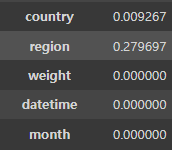


In [24]:
missing_ratio = problem_1_2_df.isnull().mean()

## problem 2-2

문제 2-1에서 생성된 missing_ratio를 활용하여 결측치 비율이 60%를 넘는 열의 이름을 담은 list를 생성하세요. 이를 활용하여 problem_1_2_df에서 결측치 비율이 60%를 넘어서는 열을 제거한 problem_2_df 데이터 프레임을 생성하세요.

In [25]:
upto_60 = ['fat_content','calcium_content']

problem_2_df = problem_1_2_df.drop(upto_60,axis=1)


#3. 함수 작성 및 적용

## problem 3-1

Input으로 문자열 또는 null을 받고 input이 null인 경우 0, input이 문자열인 경우 해당 문자열을 콤마(,)를 기준으로 분리하여 리스트를 생성하고 해당 리스트의 길이를 반환하는 count_mixed 함수를 생성하세요. (hint : split 함수를 사용해보세요.)

(input, output 예시)

(input : null / output : 0) (input : cow, goat / output : 2) (input : cow / output : 1)


In [26]:
def count_mixed(str_data):
    if pd.isnull(str_data):
        return 0
    else:
        return len(str_data.split(','))

## problem 3-2

문제 2에서 생성된 problem_2_df 데이터 프레임에 count_mixed 함수를 apply를 통해 milk, country열에 적용하고 각각의 값을 mixed, country_mixed라는 열로 저장한 problem_3_df 데이터 프레임을 생성하세요

예시)

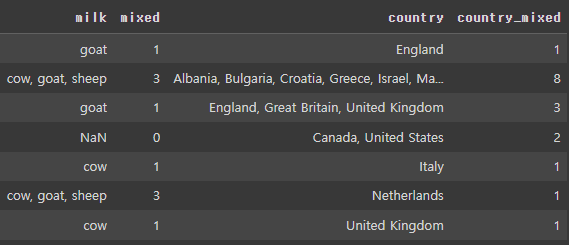

In [18]:
problem_3_df = problem_2_df.copy()
problem_3_df.insert(3,'mixed',problem_2_df['milk'].apply(count_mixed))
problem_3_df.insert(7,'country_mixed',problem_2_df['country'].apply(count_mixed))

#4. 행 선택

문제 3에서 생성된 problem_3_df 데이터 프레임에서 country_mixed열과 mixed열이 모두 1인 행들만 포함한 problem_4_df 데이터 프레임을 생성하세요.

In [17]:
problem_4_df = problem_3_df[(problem_3_df['country_mixed'] == 1) & (problem_3_df['mixed'] == 1)]

#5. filtering

문제 4에서 생성된 problem_4_df 데이터 프레임의 color 열에 대해 yellow가 포함된 행들의 color 열에 yellow를 배정한 problem_5_df 데이터 프레임을 생성하세요.
이때 re모듈의 compile을 활용하세요.

예시) 처리 이전

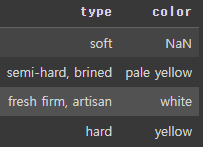

예시) 처리 이후

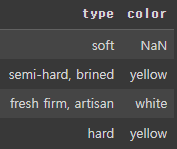

In [16]:
import re
yel = re.compile('yellow',re.IGNORECASE)

problem_5_df = problem_4_df.copy()
problem_5_df['color'] = problem_5_df['color'].apply(lambda x:'yellow' if pd.notna(x) and yel.search(x) else x)


#6. 딕셔너리 생성

문제 5에서 생성된 problem_5_df 데이터 프레임에 value_counts()를 활용해 국가명을 인덱스로 데이터 프레임에서 해당 국가에 해당하는 행의 수를 값으로 담은 시리즈 객체를 생성하세요.

해당 시리즈 객체를 to_dict()를 활용하여 dictionary형태로 바꾼 country_dict를 생성하세요. (이때 country_dict에서 value값을 기준으로 내림차순 정렬해주세요.)

In [15]:
country = problem_5_df['country'].value_counts()
country_dict = country.to_dict()